In [4]:
import pandas as pd

fd=pd.read_csv("fruit_data_with_colors.csv")
fd.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [23]:
from sklearn.preprocessing import LabelEncoder
y=fd["fruit_name"]
X=fd[["mass","width","height","color_score"]]

In [24]:
lm=LabelEncoder()

In [25]:
lm.fit_transform(y)

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lg=LogisticRegression()

In [44]:
lg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
pred=lg.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print(confusion_matrix(y_test,pred))

[[4 0 0]
 [0 3 0]
 [1 0 4]]


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       apple       0.80      1.00      0.89         4
       lemon       1.00      1.00      1.00         3
      orange       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12



In [52]:
fruit=[[192,8.4,7.3,0.55]]

In [54]:
print(lg.predict(fruit))

['apple']


In [55]:
import matplotlib.pyplot as plt

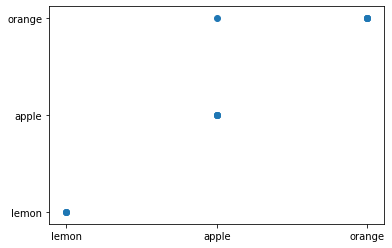

In [57]:
plt.scatter(pred,y_test)

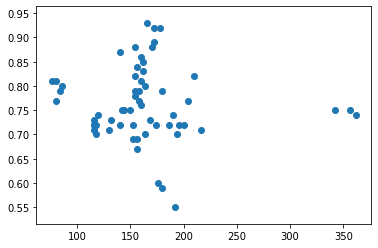

In [58]:
plt.scatter(x="mass",y="color_score",data=fd)

In [59]:
fd.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [60]:
import seaborn as sns

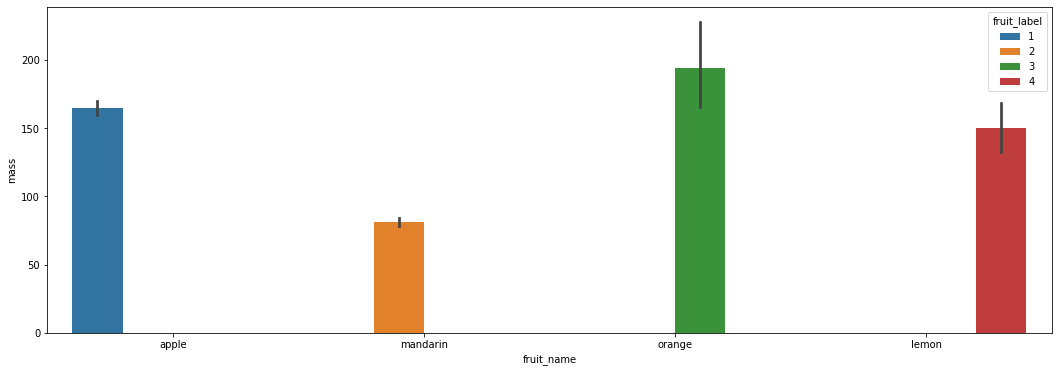

In [65]:
plt.figure(figsize=(18,6))
sns.barplot(x="fruit_name",y="mass",data=fd,hue="fruit_label")